## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

#### Aula 01 - Máquina de Vetor de Suporte

In [1]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from folium.plugins import MarkerCluster


print('Setup completo!')


Setup completo!


In [2]:
# download do dataset que será utilizado
iris = datasets.load_iris()

##### 1. Formulação do Problema

O conjunto de dados possuí 150 amostras das flores Íris em que temos os dados de quatro variáveis relacionadas as dimensões físicas da flor e uma variável representando a espécie da flor.

Nossa proposta é utilizar o modelo de aprendizagem de máquinas para classificar, baseado nas medidas de largura e comprimento das petalas e sepalas, qual espécie da flor analisada.

No notebook em questão estamos aplicando o SVM (Máquina de Vetor de Suporte) para a classificação das amostras.

Fonte: https://archive.ics.uci.edu/dataset/53/iris

Glossário do banco de dados:

* sepal length: Representa o comprimento da sépala em da flor em centímetros. Feature	Continuous		cm	false
* sepal width: Representa a largura da sépala em da flor em centímetros.
* petal length: Representa o comprimento da pépala em da flor em centímetros.
* petal width: Representa a largura da sépala em da flor em centímetros.
* class: Representa a espécie da flor, sendo: 1-setosa, 2-versicolor e 3-virginica.

In [4]:
# selecionando as medidas da pétala como entrada X e as espécies como saída y
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

In [5]:
X.shape

(150, 2)

In [6]:
# selecionando apenas as espécies setosa e versicolor para o desenvolvimento do modelo
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
# atualização do tamanho do conjunto de dados a ser usado
X.shape

(100, 2)

In [8]:
# configurando o modelo classificador SVM linear de margem rígida
svm_clf = SVC(kernel='linear', C=10000) # C=10000 é muito grande
svm_clf.fit(X, y )

SVC(C=10000, kernel='linear')

In [11]:
svm_clf.coef_[0], svm_clf.intercept_[0], svm_clf.support_vectors_

(array([1.29411744, 0.82352928]),
 -3.7882347112962464,
 array([[1.9, 0.4],
        [3. , 1.1]]))

In [12]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth = 2)
    plt.plot(x0, gutter_up, "k--", linewidth = 2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plt.annotate('Margin: {}'.format(round(margin,3)),(xmin,xmax))

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

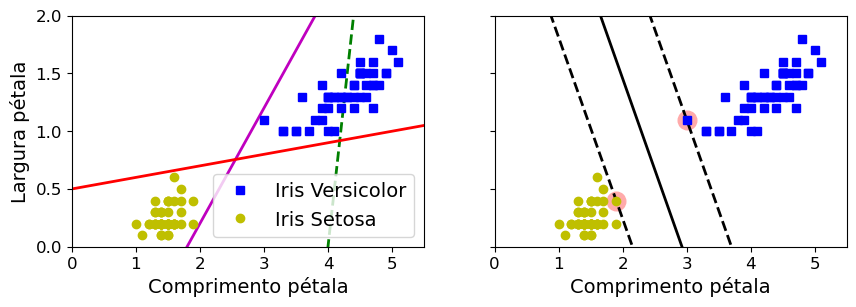

In [16]:
# Plot
fig, axes = plt.subplots(ncols=2, figsize=(10,3), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bs", label="Iris Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"yo", label="Iris Setosa")
plt.xlabel("Comprimento pétala", fontsize=14)
plt.ylabel("Largura pétala", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"yo")
plt.xlabel("Comprimento pétala", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

###### **Podemos analisar a influência das escalas dos dados na otimização do SVM**

(-2.0, 2.0, -2.0, 2.0)

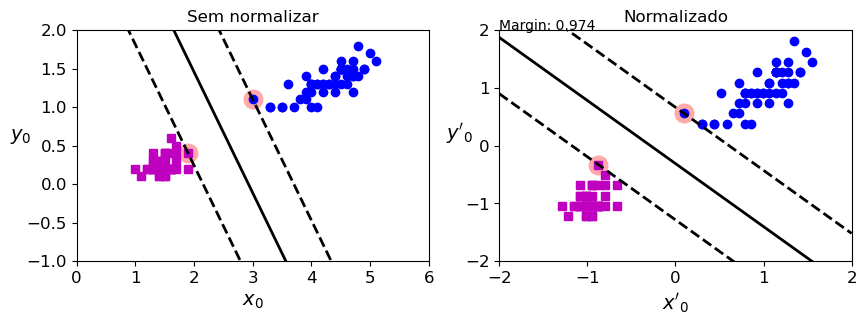

In [22]:
# sem escalonar os dados
svm_clf1 = SVC(kernel='linear', C=100)
svm_clf1.fit(X, y)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"ms")
plot_svc_decision_boundary(svm_clf1, 0, 6)
plt.xlabel("$x_0$", fontsize=14)
plt.ylabel("$y_0$", fontsize=14, rotation=0)
plt.title("Sem normalizar", fontsize=12)
plt.axis([0, 6, -1, 2])

# escalonando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf1.fit(X_scaled, y)

plt.subplot(122)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1],"bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0],"ms")
plot_svc_decision_boundary(svm_clf1, -2, 2)
plt.xlabel("$x'_0$", fontsize=14)
plt.ylabel("$y'_0$", fontsize=14, rotation=0)
plt.title("Normalizado", fontsize=12)
plt.axis([-2, 2, -2, 2])

#### Aula 02 - Máquina de Vetor de Suporte de Margens Suaves